In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, log_loss, classification_report, precision_score, recall_score, precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import  LinearSVC
from sklearn.linear_model import LogisticRegression


pd.options.display.max_seq_items = 500
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)

In [48]:
train_df = pd.read_csv('wal_train.csv')

#Dropping the missing values

In [49]:
print(train_df.isnull().any())
print(train_df['Upc'].isnull().sum())
print(train_df['DepartmentDescription'].isnull().sum())
print(train_df['FinelineNumber'].isnull().sum())

train_df[train_df['Upc'].isnull()].sample(10)

full_train_df = train_df.dropna()
print(len(train_df))
print(len(full_train_df))

TripType                 False
VisitNumber              False
Weekday                  False
Upc                       True
ScanCount                False
DepartmentDescription     True
FinelineNumber            True
dtype: bool
4129
1361
4129
647054
642925


In [50]:
pd.crosstab(full_train_df['TripType'], full_train_df['DepartmentDescription']
            , normalize='index')*100

DepartmentDescription,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",CELEBRATION,COMM BREAD,CONCEPT STORES,COOK AND DINE,DAIRY,DSD GROCERY,ELECTRONICS,FABRICS AND CRAFTS,FINANCIAL SERVICES,FROZEN FOODS,FURNITURE,"GIRLS WEAR, 4-6X AND 7-14",GROCERY DRY GOODS,HARDWARE,HEALTH AND BEAUTY AIDS,HOME DECOR,HOME MANAGEMENT,HORTICULTURE AND ACCESS,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,IMPULSE MERCHANDISE,INFANT APPAREL,INFANT CONSUMABLE HARDLINES,JEWELRY AND SUNGLASSES,LADIES SOCKS,LADIESWEAR,LARGE HOUSEHOLD GOODS,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,MEDIA AND GAMING,MENS WEAR,MENSWEAR,OFFICE SUPPLIES,OPTICAL - FRAMES,OPTICAL - LENSES,OTHER DEPARTMENTS,PAINT AND ACCESSORIES,PERSONAL CARE,PETS AND SUPPLIES,PHARMACY OTC,PHARMACY RX,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
TripType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,0.029317,0.029317,0.293169,0.073292,0.117268,0.351803,0.058634,0.058634,0.131926,0.000000,0.073292,0.351803,0.249194,0.058634,0.029317,0.175901,0.190560,0.864849,0.219877,0.102609,78.701261,0.102609,0.014658,0.029317,0.161243,0.161243,0.000000,0.029317,0.205218,0.000000,0.073292,0.073292,11.785400,0.014658,0.161243,0.146585,0.000000,0.058634,1.114043,0.131926,0.131926,0.014658,0.146585,0.542363,0.043975,0.175901,0.014658,0.000000,0.000000,0.043975,0.586338,0.161243,0.659631,0.000000,0.014658,0.014658,0.000000,0.322486,0.000000,0.000000,0.190560,0.000000,0.087951,0.029317,0.234535,0.029317,0.087951,0.043975
4,0.000000,0.111607,0.334821,1.450893,0.000000,0.781250,0.000000,0.000000,0.000000,0.000000,0.000000,1.004464,0.334821,0.892857,0.000000,0.111607,1.227679,8.147321,0.000000,0.000000,0.558036,0.669643,0.000000,0.111607,2.008929,0.111607,0.000000,0.223214,0.334821,0.446429,0.558036,1.450893,5.245536,0.000000,0.000000,0.111607,0.000000,0.000000,0.000000,0.000000,0.000000,0.111607,0.000000,0.781250,0.000000,0.223214,0.000000,0.000000,0.000000,0.111607,3.571429,0.223214,62.834821,0.000000,0.000000,0.000000,0.223214,4.129464,0.000000,0.000000,1.004464,0.000000,0.111607,0.000000,0.223214,0.000000,0.223214,0.000000
5,0.008887,0.142184,0.355461,0.586510,0.222163,2.061672,0.062206,0.133298,0.133298,0.079979,0.017773,1.181907,0.737581,0.835333,0.000000,0.479872,2.106105,5.456323,0.159957,0.542078,0.444326,1.013063,0.000000,0.115525,3.412423,0.408780,0.000000,0.328801,0.568737,0.142184,1.261886,1.013063,4.612103,0.079979,0.257709,0.213276,0.133298,0.319915,0.000000,0.533191,0.319915,0.186617,0.133298,0.684262,0.008887,0.737581,3.519062,0.755354,0.000000,0.088865,8.193371,0.844219,46.929708,1.279659,0.000000,0.008887,0.222163,3.865636,0.026660,0.008887,0.861992,0.053319,0.355461,0.142184,0.346574,0.000000,0.168844,0.097752
6,0.029394,0.088183,0.146972,0.676073,0.176367,0.676073,0.058789,0.058789,0.029394,0.000000,0.000000,19.811875,0.881834,0.940623,0.000000,0.411523,2.704292,10.582011,0.058789,0.323339,0.411523,2.469136,0.000000,0.029394,4.526749,0.235156,0.000000,0.146972,0.323339,0.117578,1.734274,1.616696,6.672546,0.058789,0.058789,0.058789,0.000000,0.352734,0.000000,0.411523,29.394474,0.734862,0.088183,0.264550,0.000000,0.411523,0.000000,0.000000,0.029394,0.029394,2.145797,0.764256,1.499118,0.000000,0.000000,0.000000,0.734862,4.350382,0.117578,0.029394,1.646091,0.000000,0.382128,0.117578,0.264550,0.000000,0.088183,0.029394
7,0.012949,0.047479,0.133805,3.871720,0.021581,0.323722,0.034530,0.064744,0.025898,0.008633,0.000000,0.651761,0.189917,5.788156,0.000000,0.267610,5.494648,9.051278,0.051796,0.112224,0.280559,9.832528,0.004316,0.051796,14.476865,0.159703,0.000000,0.103591,0.103591,0.056112,0.936637,1.044544,2.615677,0.030214,0.211499,0.056112,0.012949,0.133805,0.000000,0.233080,0.306457,6.590988,0.030214,0.19

In [51]:
#Taking out the sample data
sample_df = full_train_df.head(50000)
sample_df.head(10)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0
5,26,8,Friday,2.006619e+09,2,PAINT AND ACCESSORIES,1017.0
6,26,8,Friday,2.006614e+09,1,PAINT AND ACCESSORIES,1017.0
7,26,8,Friday,7.004803e+09,1,PAINT AND ACCESSORIES,2802.0
8,26,8,Friday,2.238495e+09,1,PAINT AND ACCESSORIES,4501.0
9,26,8,Friday,2.238400e+09,-1,PAINT AND ACCESSORIES,3565.0


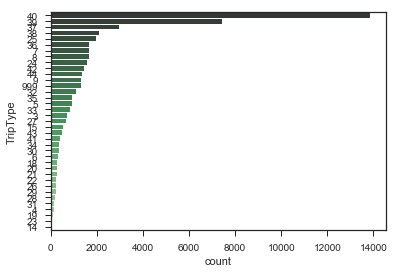

In [52]:
#Data Exploration

sns.countplot(y="TripType", data=sample_df, order = sample_df['TripType'].value_counts().index, 
              palette="Greens_d");
plt.show()

In [53]:
tt_grp = sample_df.groupby(['TripType'])
temp = tt_grp['VisitNumber'].nunique()

#Forming a new column with visit frequency for each type
def func1(tt):
    for i in temp.index:
        if i==tt:
            return temp[i]
        
sample_df['Visit_freq']  = sample_df['TripType'].apply(func1)
print(sample_df.head())


   TripType  VisitNumber Weekday           Upc  ScanCount  \
0       999            5  Friday  6.811315e+10         -1   
1        30            7  Friday  6.053882e+10          1   
2        30            7  Friday  7.410811e+09          1   
3        26            8  Friday  2.238404e+09          2   
4        26            8  Friday  2.006614e+09          2   

   DepartmentDescription  FinelineNumber  Visit_freq  
0     FINANCIAL SERVICES          1000.0         609  
1                  SHOES          8931.0          85  
2          PERSONAL CARE          4504.0          85  
3  PAINT AND ACCESSORIES          3565.0          38  
4  PAINT AND ACCESSORIES          1017.0          38  


C:\Users\Neutrino\Anaconda2\envs\py35\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


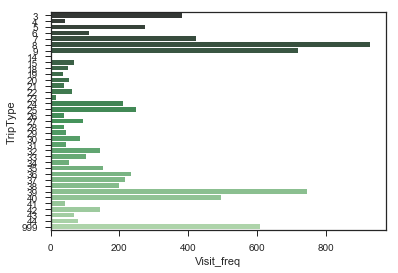

In [54]:
sns.barplot(y="TripType", x="Visit_freq", data=sample_df, palette="Greens_d", orient='h');
plt.show()

In [55]:
#Binning according to visit frequency numbers for easy analysis
bins = [0, 40, 150, 500, 1000]
l = ['Rare trips', 'Special_trips', 'Medium_trips', 'Frequent_trips']

sample_df['Trip_bins'] = pd.cut(sample_df['Visit_freq'], bins, labels=l)
sample_df.head(20)

C:\Users\Neutrino\Anaconda2\envs\py35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,Visit_freq,Trip_bins
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0,609,Frequent_trips
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0,85,Special_trips
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0,85,Special_trips
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0,38,Rare trips
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0,38,Rare trips
5,26,8,Friday,2.006619e+09,2,PAINT AND ACCESSORIES,1017.0,38,Rare trips
6,26,8,Friday,2.006614e+09,1,PAINT AND ACCESSORIES,1017.0,38,Rare trips
7,26,8,Friday,7.004803e+09,1,PAINT AND ACCESSORIES,2802.0,38,Rare trips
8,26,8,Friday,2.238495e+09,1,PAINT AND ACCESSORIES,4501.0,38,Rare trips
9,26,8,Friday,2.238400e+09,-1,PAINT AND ACCESSORIES,3565.0,38,Rare trips


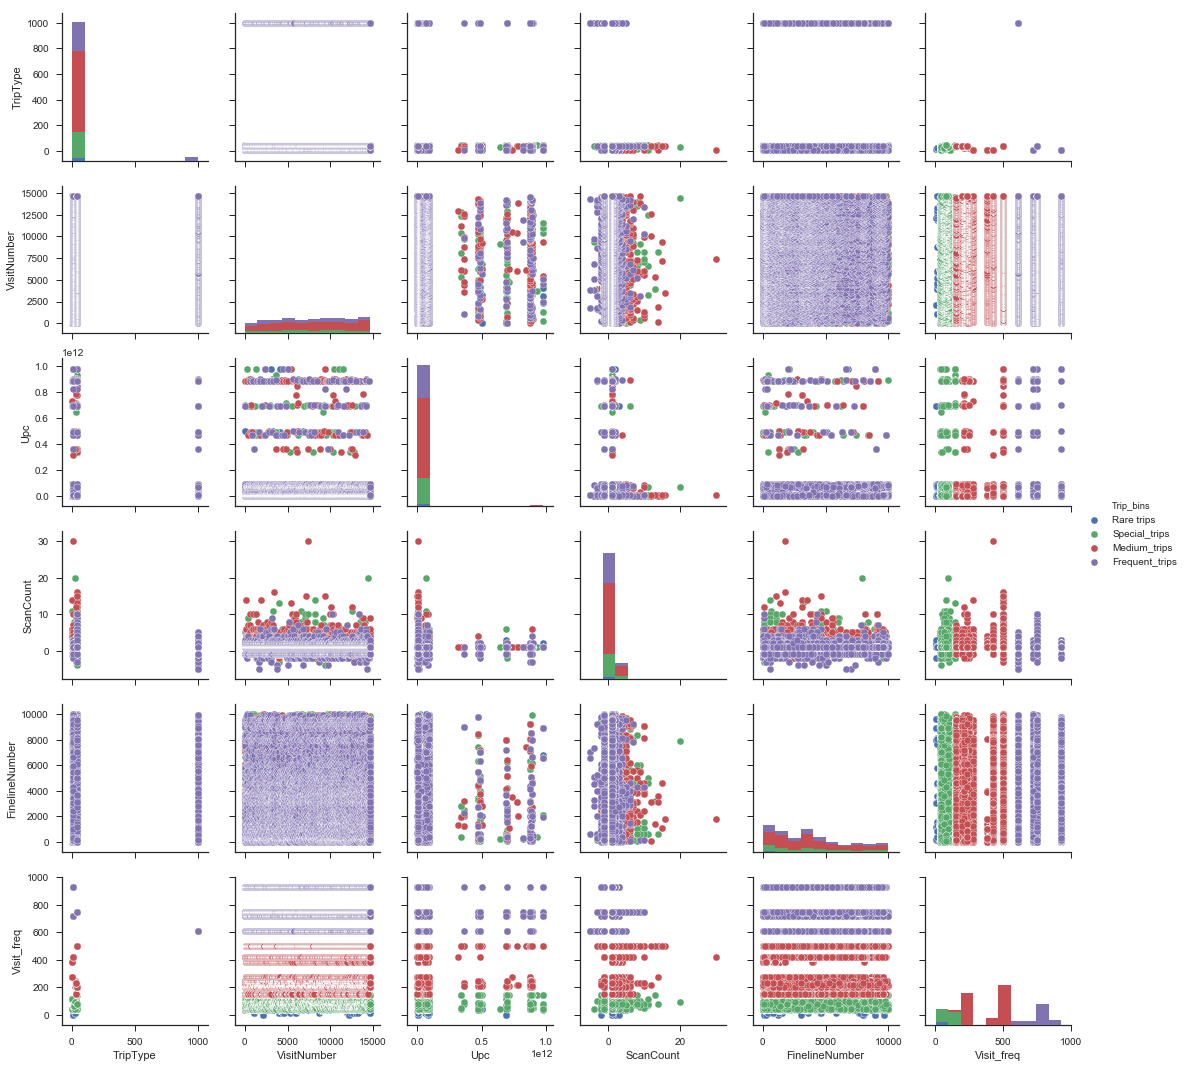

In [56]:
sns.set(style="ticks")
sns.pairplot(sample_df, hue="Trip_bins")
plt.show()

In [57]:
#Adding columns for each department with values zero
d_types = list(set(sample_df['DepartmentDescription'])-{np.nan})
walmart_df = sample_df.copy()
for item in d_types:
    walmart_df[item]=0    

In [58]:
#Placing the scan count to the department it belongs
for index, col in walmart_df.iterrows():
    col_name = col['DepartmentDescription']
    if not pd.isnull(col_name):
        walmart_df.loc[index, col_name] = walmart_df.loc[index, 'ScanCount']
    
        
walmart_df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,Visit_freq,Trip_bins,FROZEN FOODS,SLEEPWEAR/FOUNDATIONS,GROCERY DRY GOODS,INFANT APPAREL,MEDIA AND GAMING,PHARMACY OTC,SEAFOOD,SEASONAL,MEAT - FRESH & FROZEN,MENSWEAR,BATH AND SHOWER,MENS WEAR,WIRELESS,PETS AND SUPPLIES,AUTOMOTIVE,OPTICAL - FRAMES,HORTICULTURE AND ACCESS,PERSONAL CARE,SWIMWEAR/OUTERWEAR,LADIESWEAR,SERVICE DELI,CONCEPT STORES,LARGE HOUSEHOLD GOODS,CELEBRATION,PHARMACY RX,PAINT AND ACCESSORIES,BAKERY,HARDWARE,HOME DECOR,BOYS WEAR,BOOKS AND MAGAZINES,SHEER HOSIERY,BEDDING,PLUS AND MATERNITY,JEWELRY AND SUNGLASSES,PRODUCE,ACCESSORIES,COOK AND DINE,OFFICE SUPPLIES,ELECTRONICS,OPTICAL - LENSES,"GIRLS WEAR, 4-6X AND 7-14",HOUSEHOLD PAPER GOODS,FURNITURE,1-HR PHOTO,LADIES SOCKS,TOYS,COMM BREAD,OTHER DEPARTMENTS,INFANT CONSUMABLE HARDLINES,DSD GROCERY,BEAUTY,FINANCIAL SERVICES,LAWN AND GARDEN,"CANDY, TOBACCO, COOKIES",PLAYERS AND ELECTRONICS,IMPULSE MERCHANDISE,PRE PACKED DELI,FABRICS AND CRAFTS,SPORTING GOODS,CAMERAS AND SUPPLIES,"LIQUOR,WINE,BEER",HOUSEHOLD CHEMICALS/SUPP,BRAS & SHAPEWEAR,HOME MANAGEMENT,SHOES,DAIRY
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0,609,Frequent_trips,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0,85,Special_trips,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0,85,Special_trips,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0,38,Rare trips,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0,38,Rare trips,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
#Creating a new set of features
function_elements = {item: np.sum for item in d_types}
function_elements['Weekday'] = pd.Series.mode
function_elements['TripType'] = pd.Series.mode

final_df = walmart_df.groupby('VisitNumber').agg(function_elements)

In [117]:
final_df.head(20)

,FROZEN FOODS,COMM BREAD,COOK AND DINE,OFFICE SUPPLIES,SLEEPWEAR/FOUNDATIONS,GROCERY DRY GOODS,INFANT APPAREL,PHARMACY OTC,OPTICAL - LENSES,SEAFOOD,"GIRLS WEAR, 4-6X AND 7-14",HOUSEHOLD PAPER GOODS,SEASONAL,1-HR PHOTO,MEAT - FRESH & FROZEN,BATH AND SHOWER,ELECTRONICS,FINANCIAL SERVICES,MENS WEAR,MENSWEAR,WIRELESS,PETS AND SUPPLIES,SPORTING GOODS,PERSONAL CARE,AUTOMOTIVE,OTHER DEPARTMENTS,INFANT CONSUMABLE HARDLINES,DSD GROCERY,BEAUTY,OPTICAL - FRAMES,HORTICULTURE AND ACCESS,SWIMWEAR/OUTERWEAR,MEDIA AND GAMING,PLAYERS AND ELECTRONICS,LADIESWEAR,SERVICE DELI,IMPULSE MERCHANDISE,CONCEPT STORES,LARGE HOUSEHOLD GOODS,PRE PACKED DELI,SHEER HOSIERY,DAIRY,CELEBRATION,TripType,PHARMACY RX,PAINT AND ACCESSORIES,FABRICS AND CRAFTS,Weekday,LAWN AND GARDEN,"LIQUOR,WINE,BEER",BAKERY,HOUSEHOLD CHEMICALS/SUPP,HARDWARE,HOME DECOR,BRAS & SHAPEWEAR,BOYS WEAR,BEDDING,TOYS,FURNITURE,"CANDY, TOBACCO, COOKIES",BOOKS AND MAGAZINES,SHOES,PLUS AND MATERNITY,LADIES SOCKS,JEWELRY AND SUNGLASSES,CAMERAS AND SUPPLIES,ACCESSORIES,HOME MANAGEMENT,PRODUCE
VisitNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,26,0,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0


In [60]:
#Assigning numerical values to weekdays
for index,col in final_df.iterrows():
    item=col['Weekday']
    if item=='Friday':
        final_df.loc[index,'Weekday']=0
    elif item=='Saturday':
        final_df.loc[index,'Weekday']=1
    elif item=='Sunday':
        final_df.loc[index,'Weekday']=2
    elif item=='Monday':
        final_df.loc[index,'Weekday']=3
    elif item=='Tuesday':
        final_df.loc[index,'Weekday']=4
    elif item=='Wednesday':
        final_df.loc[index,'Weekday']=5
    elif item=='Thursday':
        final_df.loc[index,'Weekday']=6
    else:
        final_df.loc[index,'Weekday']=7
        
   


,FROZEN FOODS,COMM BREAD,COOK AND DINE,OFFICE SUPPLIES,SLEEPWEAR/FOUNDATIONS,GROCERY DRY GOODS,INFANT APPAREL,PHARMACY OTC,OPTICAL - LENSES,SEAFOOD,"GIRLS WEAR, 4-6X AND 7-14",HOUSEHOLD PAPER GOODS,SEASONAL,1-HR PHOTO,MEAT - FRESH & FROZEN,BATH AND SHOWER,ELECTRONICS,FINANCIAL SERVICES,MENS WEAR,MENSWEAR,WIRELESS,PETS AND SUPPLIES,SPORTING GOODS,PERSONAL CARE,AUTOMOTIVE,OTHER DEPARTMENTS,INFANT CONSUMABLE HARDLINES,DSD GROCERY,BEAUTY,OPTICAL - FRAMES,HORTICULTURE AND ACCESS,SWIMWEAR/OUTERWEAR,MEDIA AND GAMING,PLAYERS AND ELECTRONICS,LADIESWEAR,SERVICE DELI,IMPULSE MERCHANDISE,CONCEPT STORES,LARGE HOUSEHOLD GOODS,PRE PACKED DELI,SHEER HOSIERY,DAIRY,CELEBRATION,TripType,PHARMACY RX,PAINT AND ACCESSORIES,FABRICS AND CRAFTS,Weekday,LAWN AND GARDEN,"LIQUOR,WINE,BEER",BAKERY,HOUSEHOLD CHEMICALS/SUPP,HARDWARE,HOME DECOR,BRAS & SHAPEWEAR,BOYS WEAR,BEDDING,TOYS,FURNITURE,"CANDY, TOBACCO, COOKIES",BOOKS AND MAGAZINES,SHOES,PLUS AND MATERNITY,LADIES SOCKS,JEWELRY AND SUNGLASSES,CAMERAS AND SUPPLIES,ACCESSORIES,HOME MANAGEMENT,PRODUCE
VisitNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,26,0,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [118]:
final_df.head(10)

,FROZEN FOODS,COMM BREAD,COOK AND DINE,OFFICE SUPPLIES,SLEEPWEAR/FOUNDATIONS,GROCERY DRY GOODS,INFANT APPAREL,PHARMACY OTC,OPTICAL - LENSES,SEAFOOD,"GIRLS WEAR, 4-6X AND 7-14",HOUSEHOLD PAPER GOODS,SEASONAL,1-HR PHOTO,MEAT - FRESH & FROZEN,BATH AND SHOWER,ELECTRONICS,FINANCIAL SERVICES,MENS WEAR,MENSWEAR,WIRELESS,PETS AND SUPPLIES,SPORTING GOODS,PERSONAL CARE,AUTOMOTIVE,OTHER DEPARTMENTS,INFANT CONSUMABLE HARDLINES,DSD GROCERY,BEAUTY,OPTICAL - FRAMES,HORTICULTURE AND ACCESS,SWIMWEAR/OUTERWEAR,MEDIA AND GAMING,PLAYERS AND ELECTRONICS,LADIESWEAR,SERVICE DELI,IMPULSE MERCHANDISE,CONCEPT STORES,LARGE HOUSEHOLD GOODS,PRE PACKED DELI,SHEER HOSIERY,DAIRY,CELEBRATION,TripType,PHARMACY RX,PAINT AND ACCESSORIES,FABRICS AND CRAFTS,Weekday,LAWN AND GARDEN,"LIQUOR,WINE,BEER",BAKERY,HOUSEHOLD CHEMICALS/SUPP,HARDWARE,HOME DECOR,BRAS & SHAPEWEAR,BOYS WEAR,BEDDING,TOYS,FURNITURE,"CANDY, TOBACCO, COOKIES",BOOKS AND MAGAZINES,SHOES,PLUS AND MATERNITY,LADIES SOCKS,JEWELRY AND SUNGLASSES,CAMERAS AND SUPPLIES,ACCESSORIES,HOME MANAGEMENT,PRODUCE
VisitNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,26,0,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0


In [61]:
#Splitting the dataset
X = final_df.drop(['TripType'], axis=1, inplace=False)
y = final_df['TripType']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=0)

In [62]:
print(X_train.shape)
print(y_train.shape)

(6197, 68)
(6197,)


In [63]:
#Trying random forest using grid search
param_grid = {
            'n_estimators': [10, 50, 100],
            'min_samples_leaf': [10, 20, 50]
}

rf_model = RandomForestClassifier()
g_s_model = GridSearchCV(estimator = rf_model, 
                         param_grid=param_grid, refit=True)

g_s_model.fit(X_train, y_train)
g_s_model.best_estimator_

C:\Users\Neutrino\Anaconda2\envs\py35\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
#Evaluating the random forest model
print(g_s_model.score(X_train, y_train))
print(g_s_model.score(X_test, y_test))

y_pred = g_s_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.570760045183
0.526508226691
             precision    recall  f1-score   support

          3       0.77      0.93      0.85        44
          4       0.00      0.00      0.00         7
          5       0.50      0.84      0.63        44
          6       0.40      0.36      0.38        11
          7       0.58      0.59      0.59        73
          8       0.44      0.79      0.57       142
          9       0.53      0.52      0.53       105
         15       0.00      0.00      0.00        11
         18       0.00      0.00      0.00        10
         19       0.00      0.00      0.00         3
         20       0.75      0.38      0.50         8
         21       0.00      0.00      0.00         2
         22       0.00      0.00      0.00         8
         23       0.00      0.00      0.00         4
         24       0.62      0.28      0.38        29
         25       0.70      0.41      0.52        39
         26       0.00      0.00      0.00         4
         27    

C:\Users\Neutrino\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
#Using balanced approach to stop assigning more weights to just some trip types
rf = RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(g_s_model.score(X_train, y_train))
print(g_s_model.score(X_test, y_test))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.570760045183
0.526508226691
             precision    recall  f1-score   support

          3       0.77      0.93      0.85        44
          4       0.10      1.00      0.18         7
          5       0.11      0.02      0.04        44
          6       0.24      0.73      0.36        11
          7       0.63      0.68      0.66        73
          8       0.78      0.47      0.59       142
          9       0.90      0.09      0.16       105
         14       0.00      0.00      0.00         0
         15       0.42      0.45      0.43        11
         18       0.30      0.70      0.42        10
         19       0.21      1.00      0.35         3
         20       0.35      1.00      0.52         8
         21       0.10      1.00      0.17         2
         22       0.00      0.00      0.00         8
         23       0.40      1.00      0.57         4
         24       0.59      0.34      0.43        29
         25       0.62      0.41      0.49        39
         26    

C:\Users\Neutrino\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Neutrino\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [66]:
#Checking the feature importance
f_imp = list(zip(final_df.columns, g_s_model.best_estimator_.feature_importances_))
f_imp.sort(key=lambda x:x[1], reverse=True)
f_imp

[('FINANCIAL SERVICES', 0.18489832207069237),
 ('DSD GROCERY', 0.076410767565965487),
 ('GROCERY DRY GOODS', 0.069798601551396278),
 ('PERSONAL CARE', 0.059239618641343),
 ('PHARMACY OTC', 0.052423392148788633),
 ('SERVICE DELI', 0.051447215471057434),
 ('DAIRY', 0.047048106342534764),
 ('HOME MANAGEMENT', 0.044543694972661453),
 ('BAKERY', 0.032079484796933289),
 ('INFANT CONSUMABLE HARDLINES', 0.030777241764195152),
 ('MENS WEAR', 0.025159543137638431),
 ('HOUSEHOLD PAPER GOODS', 0.021673445332499944),
 ('IMPULSE MERCHANDISE', 0.020949083862350421),
 ('LAWN AND GARDEN', 0.019299688676240035),
 ('FROZEN FOODS', 0.019153406687166353),
 ('LADIESWEAR', 0.016499483897973889),
 ('COMM BREAD', 0.016288623842378478),
 ('MEAT - FRESH & FROZEN', 0.014674302562499599),
 ('AUTOMOTIVE', 0.013949357817152499),
 ('COOK AND DINE', 0.012963359057230749),
 ('OPTICAL - FRAMES', 0.012254159156947095),
 ('ELECTRONICS', 0.011756226290752524),
 ('BEAUTY', 0.011462119964128816),
 ('PETS AND SUPPLIES', 0.011

In [67]:
#Training data on the gradient boosting model
gbt_model = GradientBoostingClassifier()
gbt_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [68]:
print(gbt_model.score(X_train, y_train))
print(gbt_model.score(X_test, y_test))

y_pred = gbt_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.795546232048
0.594149908592
             precision    recall  f1-score   support

          3       0.79      0.95      0.87        44
          4       0.00      0.00      0.00         7
          5       0.56      0.84      0.67        44
          6       0.46      0.55      0.50        11
          7       0.67      0.60      0.63        73
          8       0.63      0.85      0.73       142
          9       0.63      0.70      0.66       105
         15       0.57      0.36      0.44        11
         18       0.25      0.10      0.14        10
         19       0.00      0.00      0.00         3
         20       0.67      0.50      0.57         8
         21       0.17      0.50      0.25         2
         22       0.22      0.25      0.24         8
         23       0.50      0.50      0.50         4
         24       0.57      0.45      0.50        29
         25       0.68      0.67      0.68        39
         26       0.33      0.50      0.40         4
         27    

In [69]:
#Normalizing all my  features values

X_s = (X - X.mean())/X.std()
X_train_s, X_test_s = train_test_split(X_s, test_size=.15, random_state=0)

In [70]:
#Training  data on SVC model
svc_model = LinearSVC()
svc_model.fit(X_train_s, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [71]:
#Evaluating  the model
print(svc_model.score(X_train_s, y_train))
print(svc_model.score(X_test_s, y_test))

y_pred = svc_model.predict(X_test_s)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.616588671938
0.574040219378
             precision    recall  f1-score   support

          3       0.78      0.95      0.86        44
          4       0.00      0.00      0.00         7
          5       0.51      0.80      0.62        44
          6       0.50      0.27      0.35        11
          7       0.65      0.59      0.62        73
          8       0.52      0.77      0.62       142
          9       0.62      0.55      0.59       105
         15       0.67      0.18      0.29        11
         18       0.50      0.30      0.37        10
         19       0.00      0.00      0.00         3
         20       0.55      0.75      0.63         8
         21       0.20      1.00      0.33         2
         22       0.36      0.50      0.42         8
         23       0.00      0.00      0.00         4
         24       0.45      0.45      0.45        29
         25       0.60      0.85      0.70        39
         26       0.50      0.50      0.50         4
         27    

C:\Users\Neutrino\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
#Performing Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_s, y_train)
#Evaluating the model
print(lr_model.score(X_train_s, y_train))
print(lr_model.score(X_test_s, y_test))

y_pred = lr_model.predict(X_test_s)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


In [97]:
y_test.values

array([ 3, 25,  7, ..., 37,  9,  7], dtype=int64)

In [112]:
#Further  refining the new feauture set
print(walmart_df.groupby(['DepartmentDescription']).Upc.nunique())
print(walmart_df.DepartmentDescription.nunique())


DepartmentDescription
1-HR PHOTO                       12
ACCESSORIES                      82
AUTOMOTIVE                      320
BAKERY                          193
BATH AND SHOWER                 236
BEAUTY                          755
BEDDING                         122
BOOKS AND MAGAZINES              37
BOYS WEAR                       236
BRAS & SHAPEWEAR                138
CAMERAS AND SUPPLIES             11
CANDY, TOBACCO, COOKIES         400
CELEBRATION                     569
COMM BREAD                      323
CONCEPT STORES                    2
COOK AND DINE                   480
DAIRY                           977
DSD GROCERY                    1577
ELECTRONICS                     172
FABRICS AND CRAFTS              392
FINANCIAL SERVICES               44
FROZEN FOODS                    916
FURNITURE                        29
GIRLS WEAR, 4-6X  AND 7-14      265
GROCERY DRY GOODS              2870
HARDWARE                        317
HOME DECOR                      297
HOME M

In [113]:
def func(dept):
    if dept=='MENS WEAR':
        return 'MENSWEAR'
    elif dept=='PHARMACY OTC'or dept=='PHARMACY RX':
        return 'PHARMACY'
    elif (dept=='OPTICAL - FRAMES'or dept=='OPTICAL - LENSES' or dept=='JEWELRY AND SUNGLASSES' or 
                dept=='ACCESSORIES'):
        return 'ACCESSORIES'
    elif (dept=='INFANT APPAREL'or dept=='INFANT CONSUMABLE HARDLINES' or 
          dept=='PLUS AND MATERNITY' or dept=='TOYS'):
        return 'INFANT AND MATERNITY'
    elif (dept=='HORTICULTURE AND ACCESS' or dept=='HOUSEHOLD PAPER GOODS' or 
                dept=='HOUSEHOLD CHEMICALS/SUPP'):
        return 'HOUSEHOLD GOODS'
    elif (dept=='HOME DECOR'or dept=='HOME MANAGEMENT' or dept=='HARDWARE' or 
            dept=='LARGE HOUSEHOLD GOODS' or dept=='FURNITURE' or dept=='LAWN AND GARDEN' or 
         dept=='BEDDING' or dept=='PAINT AND ACCESSORIES'):
        return 'HOME DECOR(LARGE/SMALL)'
    elif (dept=='BAKERY'or dept=='CANDY, TOBACCO, COOKIES' or 
            dept=='COMM BREAD' or dept=='COOK AND DINE' or dept=='DAIRY' or 
            dept=='DSD GROCERY' or dept=='FROZEN FOODS'or dept=='GROCERY DRY GOODS' or 
            dept=='LIQUOR,WINE,BEER' or dept=='MEAT - FRESH & FROZEN' or dept=='PRE PACKED DELI' or 
            dept=='PRODUCE' or dept=='SEAFOOD' or dept=='SERVICE DELI'):
        return 'FOOD AND GROCERY'
    elif (dept=='CAMERAS AND SUPPLIES'or dept=='ELECTRONICS' or dept=='MEDIA AND GAMING' or 
            dept=='PLAYERS AND ELECTRONICS' or dept=='WIRELESS'):
        return 'ELECTRONICS'
    elif (dept=='BRAS & SHAPEWEAR'or dept=='LADIES SOCKS' or dept=='LADIESWEAR' or 
            dept=='SHEER HOSIERY'):
        return 'LADIES SECTION'
    elif dept=='SWIMWEAR/OUTERWEAR'or dept=='SPORTING GOODS':
        return 'SPORTS'
    elif dept=='OFFICE SUPPLIES'or dept=='BOOKS AND MAGAZINES':
        return 'OFFICE'
    elif dept=='BATH AND SHOWER'or dept=='BEAUTY':
        return 'PERSONAL CARE'
    elif dept=='1-HR PHOTO'or dept=='CONCEPT STORES' or dept=='SEASONAL':
        return 'OTHER DEPARTMENTS'
    else:
        return dept
    
            
sample_df['New_dept'] = sample_df['DepartmentDescription'].apply(func)
print(sample_df.groupby(['New_dept']).Upc.nunique())
print(sample_df.New_dept.nunique())

New_dept
ACCESSORIES                    318
AUTOMOTIVE                     320
BOYS WEAR                      236
CELEBRATION                    569
ELECTRONICS                    447
FABRICS AND CRAFTS             392
FINANCIAL SERVICES              44
FOOD AND GROCERY              9275
GIRLS WEAR, 4-6X  AND 7-14     265
HOME DECOR(LARGE/SMALL)       1578
HOUSEHOLD GOODS               1443
IMPULSE MERCHANDISE            657
INFANT AND MATERNITY          1362
LADIES SECTION                 817
MENSWEAR                       690
OFFICE                         367
OTHER DEPARTMENTS               21
PERSONAL CARE                 2805
PETS AND SUPPLIES              627
PHARMACY                      1214
SHOES                          352
SLEEPWEAR/FOUNDATIONS          198
SPORTS                         322
Name: Upc, dtype: int64
23


C:\Users\Neutrino\Anaconda2\envs\py35\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [114]:
#Producing new set of features again

d_types = list(set(sample_df['New_dept'])-{np.nan})
for item in d_types:
    sample_df[item]=0
   
    
for index, col in sample_df.iterrows():
    col_name = col['New_dept']
    if not pd.isnull(col_name):
        sample_df.loc[index, col_name] = sample_df.loc[index, 'ScanCount']
    
    
print(sample_df.head())


C:\Users\Neutrino\Anaconda2\envs\py35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Neutrino\Anaconda2\envs\py35\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


   TripType  VisitNumber Weekday           Upc  ScanCount  \
0       999            5  Friday  6.811315e+10         -1   
1        30            7  Friday  6.053882e+10          1   
2        30            7  Friday  7.410811e+09          1   
3        26            8  Friday  2.238404e+09          2   
4        26            8  Friday  2.006614e+09          2   

   DepartmentDescription  FinelineNumber  Visit_freq       Trip_bins  \
0     FINANCIAL SERVICES          1000.0         609  Frequent_trips   
1                  SHOES          8931.0          85   Special_trips   
2          PERSONAL CARE          4504.0          85   Special_trips   
3  PAINT AND ACCESSORIES          3565.0          38      Rare trips   
4  PAINT AND ACCESSORIES          1017.0          38      Rare trips   

                  New_dept  ELECTRONICS  SLEEPWEAR/FOUNDATIONS  SPORTS  \
0       FINANCIAL SERVICES            0                      0       0   
1                    SHOES            0             

In [115]:
#Reorganizing and modelling the new improved dataset
function_elements = {item: np.sum for item in d_types}
function_elements['Weekday'] = pd.Series.mode
function_elements['TripType'] = pd.Series.mode

sam_df = sample_df.groupby('VisitNumber').agg(function_elements)


for index,col in sam_df.iterrows():
    item=col['Weekday']
    if item=='Friday':
        sam_df.loc[index,'Weekday']=0
    elif item=='Saturday':
        sam_df.loc[index,'Weekday']=1
    elif item=='Sunday':
        sam_df.loc[index,'Weekday']=2
    elif item=='Monday':
        sam_df.loc[index,'Weekday']=3
    elif item=='Tuesday':
        sam_df.loc[index,'Weekday']=4
    elif item=='Wednesday':
        sam_df.loc[index,'Weekday']=5
    elif item=='Thursday':
        sam_df.loc[index,'Weekday']=6
    else:
        sam_df.loc[index,'Weekday']=7
        
   
print(sam_df.head())


X_s = sam_df.drop(['TripType'], axis=1, inplace=False)
y_s = sam_df['TripType']
X_trains, X_tests, y_trains, y_tests = train_test_split(X_s, y_s, test_size=.15, random_state=0)

             ELECTRONICS  SLEEPWEAR/FOUNDATIONS  SPORTS  IMPULSE MERCHANDISE  \
VisitNumber                                                                    
5                      0                      0       0                    0   
7                      0                      0       0                    0   
8                      0                      0       0                    0   
9                      0                      0       0                    1   
10                     0                      0       0                    0   

             FABRICS AND CRAFTS  HOUSEHOLD GOODS  CELEBRATION  \
VisitNumber                                                     
5                             0                0            0   
7                             0                0            0   
8                             0                1            0   
9                             0                0            0   
10                            0                0 

In [116]:
#Performing Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_trains, y_trains)
#Evaluating
print(lr_model.score(X_trains, y_trains))
print(lr_model.score(X_tests, y_tests))
y_pred = lr_model.predict(X_tests)
print(classification_report(y_tests, y_pred))
print(confusion_matrix(y_tests, y_pred))

0.551879941907
0.542047531993
             precision    recall  f1-score   support

          3       0.77      0.93      0.85        44
          4       0.00      0.00      0.00         7
          5       0.57      0.73      0.64        44
          6       0.00      0.00      0.00        11
          7       0.21      0.14      0.17        73
          8       0.45      0.94      0.61       142
          9       0.56      0.76      0.64       105
         15       0.67      0.18      0.29        11
         18       0.00      0.00      0.00        10
         19       0.00      0.00      0.00         3
         20       0.57      0.50      0.53         8
         21       0.33      1.00      0.50         2
         22       0.30      0.38      0.33         8
         23       0.00      0.00      0.00         4
         24       0.35      0.21      0.26        29
         25       0.72      0.72      0.72        39
         26       0.00      0.00      0.00         4
         27    

C:\Users\Neutrino\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
